In [1]:
import pickle

import numpy as np
import pandas as pd

In [2]:
entire = pd.read_table('Tables/Entire_table.tsv')

In [3]:
entire

,Unnamed: 0,water,octanol,hexadecane,chloroform,cyclohexane,carbontet,benzene,diethylether,heptane,...,aceticacid,tetrahydrofuran,fluoroctane,dimethylpyridine,onitrotoluene,phenylether,2methylpyridine,methoxyethanol,secbutylbenzene,bromooctane
0,ethanol,-5.01,-4.36,-2.03,-3.94,-2.42,-2.96,-3.42,-4.41,-2.15,...,-5.25,-4.56,NaN,-4.87,NaN,-3.22,-5.01,-4.71,NaN,NaN
1,toluene,NaN,-4.55,-4.54,-5.48,-4.90,-5.12,-5.32,-5.23,-4.78,...,-4.53,-5.50,NaN,-5.03,NaN,-4.86,-5.06,-4.49,NaN,NaN
2,2-butanone,-3.64,-3.78,-3.12,-5.43,-3.48,-4.09,-4.46,-4.09,-3.36,...,-4.80,-4.54,NaN,-4.34,NaN,-4.08,-4.52,-4.28,NaN,NaN
3,n-octane,2.89,-4.18,-5.02,-5.25,-5.63,-5.39,-5.35,-5.62,NaN,...,-3.93,-5.39,NaN,-4.88,NaN,-4.38,-4.73,-3.71,NaN,NaN
4,nitromethane,-3.95,-3.51,-2.58,-4.68,-2.86,-3.52,-4.50,-4.19,NaN,...,-4.88,-5.09,NaN,NaN,NaN,-4.19,NaN,-5.06,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,methyl isopropyl ether,NaN,-4.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
396,methyl isopropyl ether,-2.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
397,diethyl ether,-1.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398,1-nonanol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
entire = entire.set_index('Unnamed: 0')

In [5]:
entire.index.name

'Unnamed: 0'

In [ ]:
sample_dict = ()
for solvent in entire.columns.tolist():
    for solute in entire.index.tolist():
        print(f'{entire[solvent][solute]}')

In [7]:
from my_nets.Create_dataset import *
table_sample = entire[['water']].loc[['ethanol']]
sample_ds = SS_Dataset(table_sample, 'solvent_macro_props1', 'solute_TESA')

In [10]:
from torch.utils.data import DataLoader
sample_loader = DataLoader(sample_ds)

In [11]:
for data, G in sample_loader:
    print(data)
    print(G)

tensor([[[  1.3328,   0.8200,   0.3500, 103.6200,  78.3600,   0.0000,   0.0000,
           77.8510,  14.6630,  42.9450,   9.0070,   0.0000,  18.3550,   9.7300,
            0.0000,   0.0000]]])
tensor([-5.0100])


In [20]:
entire.loc('water', :)

SyntaxError: invalid syntax (1977828965.py, line 1)

In [37]:
type(entire)

pandas.core.frame.DataFrame

In [42]:
df1 = entire[['water']]

In [70]:
entire[['water']].loc[['ethanol']]


,water
Unnamed: 0,
ethanol,-5.01


In [12]:
solvent = 'water'
solute = 'ethanol'

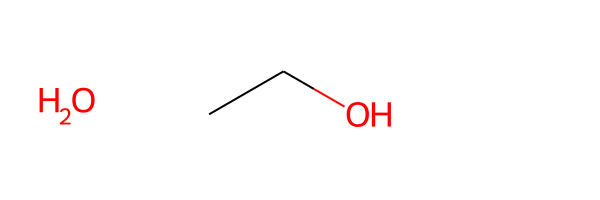

In [34]:
    from rdkit import Chem
    solvent_smiles = get_smiles(solvent)
    solute_smiles = get_smiles(solute)
    solvent_mol = Chem.MolFromSmiles(solvent_smiles)
    solute_mol = Chem.MolFromSmiles(solute_smiles)
    Chem.Draw.MolsToGridImage((solvent_mol,solute_mol))
    # solvent_mol
    # solute_mol

In [38]:
x = Chem.Draw.MolsToGridImage((solvent_mol,solute_mol))


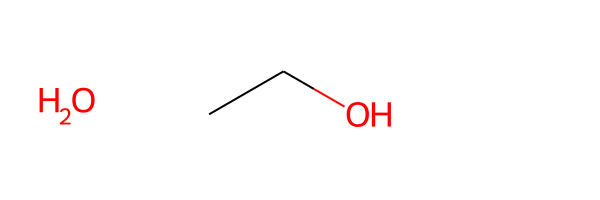

In [41]:
display(x)

In [2]:
15%5

0

In [5]:
1e+16

1e+16

In [10]:
from my_nets.net_func import *
from my_nets.LinearNet import LinearNet3
from Solvation_1.config import *
ckp_path = project_path('Solvation_1/Runs/Macro_TESA_Lin1_60.pt')

model = LinearNet3(in_features = 16)
loss_function = nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters())
model, optimizer, start_epoch, val_loss_min = load_ckp(ckp_path, model, optimizer)

In [19]:
model.state_dict()

OrderedDict([('linear_relu_stack.0.weight',
              tensor([[ 0.1270,  0.0895, -0.0068,  ..., -0.1914, -0.0793,  0.2717],
                      [-0.1311,  0.0301,  0.2168,  ..., -0.2162, -0.0725, -0.0080],
                      [-0.1098, -0.1503, -0.3257,  ..., -0.2003,  0.2508, -0.0311],
                      ...,
                      [-0.1462, -0.0085, -0.1034,  ...,  0.1087,  0.1157,  0.0218],
                      [-0.0252, -0.1709, -0.0092,  ..., -0.0782,  0.2429, -0.2045],
                      [ 0.0582,  0.0820,  0.3946,  ...,  0.2554,  0.1419, -0.1981]])),
             ('linear_relu_stack.0.bias',
              tensor([-1.9671e-01,  3.2156e-02,  1.2015e-01,  1.5963e-01,  3.4515e-01,
                       2.0934e-01,  7.4711e-02,  3.1928e-01,  2.2085e-01, -1.5931e-01,
                       5.9220e-02, -9.9872e-02, -3.0587e-02, -1.9686e-01,  2.4153e-01,
                       2.2689e-01,  2.6045e-01, -1.6337e-01, -1.5742e-01, -1.8365e-01,
                      -1.9476e-0

In [20]:
ckp_path = project_path('Solvation_1/Runs/Macro_TESA_Lin1_85.pt')

model, optimizer, start_epoch, val_loss_min = load_ckp(ckp_path, model, optimizer)

In [22]:
val_loss_min

0.44217586517333984

In [5]:
import pandas as pd
norm_table = pd.read_table('../Solvation_1/Tables/MNSol_alldata.txt')

In [6]:
norm_table

,No.,FileHandle,SoluteName,Formula,Subset,Charge,Level1,Level2,Level3,Solvent,...,OSi,P,HP,OP,S,HS,OS,SP,SS,TotalArea
0,1,0008noc,n-octane,H18C8,[g],0,2,1,1,2methylpyridine,...,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,243.846
1,2,0036tol,toluene,H8C7,[g],0,2,1,6,2methylpyridine,...,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,166.450
2,3,0045eth,ethanol,H6C2O1,[g],0,2,2,1,2methylpyridine,...,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,110.185
3,4,0062dio,"1,4-dioxane",H8C4O2,[g],0,2,3,0,2methylpyridine,...,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,146.316
4,5,0076but,2-butanone,H8C4O1,[g],0,2,4,2,2methylpyridine,...,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,148.104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3032,3033,i099,benzamide,H8C7N1O1,[i],1,13,4,0,water,...,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,184.905
3033,3034,i106,dimethylsulfide,H7C2S1,[i],1,13,5,0,water,...,0.0,0.0,0.0,0.0,20.476,11.664,0.000,0.0,0.0,127.327
3034,3035,i112,dimethylsulfoxide,H7C2O1S1,[i],1,13,5,0,water,...,0.0,0.0,0.0,0.0,17.024,7.606,7.913,0.0,0.0,137.588
3035,3036,i125,3-chloroaniline,H7C6N1CL1,[i],1,13,6,0,water,...,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,182.699


In [9]:
import torch
testa = torch.tensor(((1,2,3),(4,5,6),(7,8,9)))

In [18]:
testa = testa.float()
testa

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [17]:
torch.std_mean(testa, dim = 1)

(tensor([1., 1., 1.]), tensor([2., 5., 8.]))

In [24]:
True in (False, True, True)

True

In [27]:
pd.read_table('../Solvation_1/Tables/Entire_table.tsv').columns


Index(['Unnamed: 0', 'water', 'octanol', 'hexadecane', 'chloroform',
       'cyclohexane', 'carbontet', 'benzene', 'diethylether', 'heptane',
       'hexane', 'toluene', 'xylene', 'decane', 'dichloroethane', 'octane',
       'chlorobenzene', 'isooctane', 'ethylbenzene', 'bromobenzene', 'pentane',
       'decalin', 'nonane', 'pentanol', 'diisopropylether', 'butylacetate',
       'ethylacetate', 'butanol', 'iodobenzene', 'isopropylbenzene',
       'isobutanol', 'tributylphosphate', 'perfluorobenzene',
       'carbondisulfide', 'dibutylether', 'nitrobenzene', 'hexanol',
       'tbutylbenzene', 'undecane', 'butanone', '4methyl2pentanone',
       'bromoform', 'heptanol', 'trimethylbenzene', 'odichlorobenzene',
       'chlorohexane', 'methylenechloride', 'decanol', 'butylbenzene',
       'benzylalcohol', 'tetrachloroethene', 'nonanol', 'aniline',
       'dibromoethane', 'cyclohexanone', 'acetophenone', 'tetralin',
       'secbutanol', 'hexadecyliodide', 'pentadecane', 'anisole', 'ethanol',
 

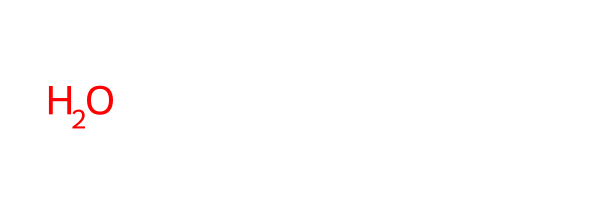

water


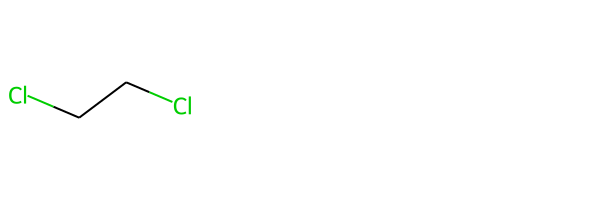

dichloroethane


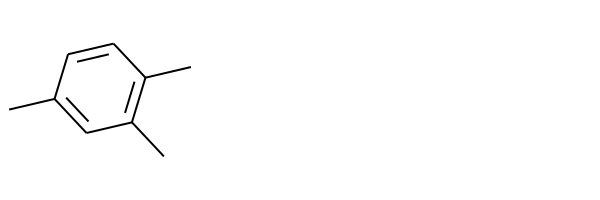

trimethylbenzene


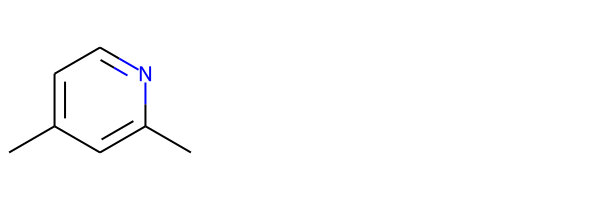

dimethylpyridine


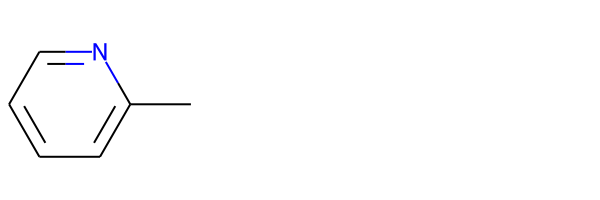

2methylpyridine


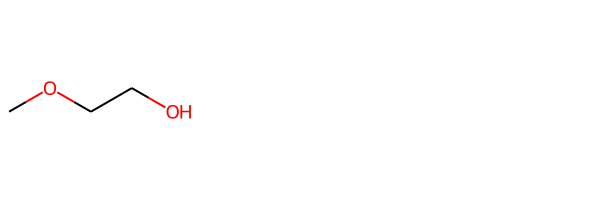

methoxyethanol


RDKit WARNING: [12:07:28] WARNING: not removing hydrogen atom without neighbors
RDKit ERROR: [12:07:28] SMILES Parse Error: syntax error while parsing: Did
[12:07:28] WARNING: not removing hydrogen atom without neighbors
RDKit ERROR: [12:07:28] SMILES Parse Error: Failed parsing SMILES 'Did' for input: 'Did'
[12:07:28] SMILES Parse Error: syntax error while parsing: Did
[12:07:28] SMILES Parse Error: Failed parsing SMILES 'Did' for input: 'Did'


In [12]:
import pickle
from config import *
from rdkit import Chem

interesting = ('water', 'trimethylbenzene', 'methoxyethanol', 'dichloroethane', '2methylpyridine', 'dimethylpyridine')
with open(project_path('Solvation_1/Tables/get_SMILES.pkl'), 'rb') as f:
    smiles_dict = pickle.load(f)
# smiles_dict
for compound, smiles in smiles_dict.items():
    mol = Chem.MolFromSmiles(smiles)
    if compound in interesting:
        display(Chem.Draw.MolsToGridImage((mol,)))
        print(compound)

In [7]:
import pickle as pkl
from Solvation_1.Preprocess.Create_smiles_pkl import create_smiles_dict
get_SMILES = create_smiles_dict()
get_SMILES

CCCCCCCCO

O



{'water': 'O',
 'octanol': 'CCCCCCCCO',
 'hexadecane': 'CCCCCCCCCCCCCCCC',
 'chloroform': 'ClC(Cl)Cl',
 'cyclohexane': 'C1CCCCC1',
 'carbontet': 'C(Cl)(Cl)(Cl)Cl',
 'benzene': 'c1ccccc1',
 'diethylether': 'CCOCC',
 'heptane': 'CCCCCCC',
 'hexane': 'CCCCCC',
 'toluene': 'Cc1ccccc1',
 'xylene': 'Cc1ccccc1C',
 'decane': 'CCCCCCCCCC',
 'dichloroethane': 'CC(Cl)Cl',
 'octane': 'CCCCCCCC',
 'chlorobenzene': 'Clc1ccccc1',
 'isooctane': 'CCCCCC(C)C',
 'ethylbenzene': 'CCc1ccccc1',
 'bromobenzene': 'Brc1ccccc1',
 'pentane': 'CCCCC',
 'decalin': 'C1CCC2CCCCC2C1',
 'nonane': 'CCCCCCCCC',
 'pentanol': 'CCCCCO',
 'diisopropylether': 'CC(C)OC(C)C',
 'butylacetate': 'CCCCOC(C)=O',
 'ethylacetate': 'CCOC(C)=O',
 'butanol': 'CCCCO',
 'iodobenzene': 'Ic1ccccc1',
 'isopropylbenzene': 'CC(C)c1ccccc1',
 'isobutanol': 'CC(C)CO',
 'tributylphosphate': 'CCCCO[P](=O)(OCCCC)OCCCC',
 'perfluorobenzene': 'Fc1c(F)c(F)c(F)c(F)c1F',
 'carbondisulfide': 'S=C=S',
 'dibutylether': 'CCCCOCCCC',
 'nitrobenzene': '[O-][N+

In [ ]:

with open((project_path('Solvation_1/Tables/get_SMILES.pkl')), 'wb') as g:
    pkl.dump(get_SMILES, g)

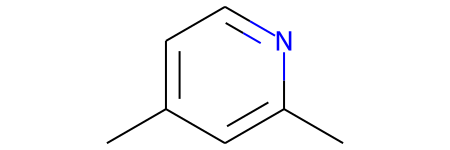

In [11]:
Chem.MolFromSmiles('Cc1cc(C)ccn1')

In [44]:
smiles_dict = {}
with open(project_path('Solvation_1/Tables/SMILES_solutes_all.txt')) as f:
    for line in f:
        i, compound, smiles = line.split('\t')
        smiles = smiles.strip()
        print(i, compound, smiles)
        smiles_dict[compound] = smiles

0 ethanol CCO

1 toluene Cc1ccccc1

2 2-butanone CCC(C)=O

3 n-octane CCCCCCCC

4 nitromethane C[N+]([O-])=O

5 1,4-dioxane C1COCCO1

6 phenol Oc1ccccc1

7 acetic acid CC(O)=O

8 ethyl acetate CCOC(C)=O

9 butyl acetate CCCCOC(C)=O

10 propanoic acid CCC(O)=O

11 methyl acetate COC(C)=O

12 1-hexanol CCCCCCO

13 1-propanol CCCO

14 1-butanol CCCCO

15 1-pentanol CCCCCO

16 butylamine CCCCN

17 propyl acetate CCCOC(C)=O

18 methanol CO

19 1-heptanol CCCCCCCO

20 ethylamine CCN

21 propylamine CCCN

22 methyl pentanoate CCCCC(=O)OC

23 methyl propanoate CCC(=O)OC

24 p-cresol Cc1ccc(O)cc1

25 pentyl acetate CCCCCOC(C)=O

26 o-cresol Cc1ccccc1O

27 p-bromophenol Oc1ccc(Br)cc1

28 aniline Nc1ccccc1

29 2-hexanone CCCCC(C)=O

30 2-pentanone CCCC(C)=O

31 2-heptanone CCCCCC(C)=O

32 butanoic acid CCCC(O)=O

33 3,3-dimethylbutanone CC(=O)C(C)(C)C

34 acetone CC(C)=O

35 methyl hexanoate CCCCCC(=O)OC

36 benzene c1ccccc1

37 pyridine c1ccncc1

38 m-cresol Cc1cccc(O)c1

39 water O

40 diethyla

In [13]:
import periodictable as pt

In [23]:
pt.elements.__dict__['_element']

{0: n,
 1: H,
 2: He,
 3: Li,
 4: Be,
 5: B,
 6: C,
 7: N,
 8: O,
 9: F,
 10: Ne,
 11: Na,
 12: Mg,
 13: Al,
 14: Si,
 15: P,
 16: S,
 17: Cl,
 18: Ar,
 19: K,
 20: Ca,
 21: Sc,
 22: Ti,
 23: V,
 24: Cr,
 25: Mn,
 26: Fe,
 27: Co,
 28: Ni,
 29: Cu,
 30: Zn,
 31: Ga,
 32: Ge,
 33: As,
 34: Se,
 35: Br,
 36: Kr,
 37: Rb,
 38: Sr,
 39: Y,
 40: Zr,
 41: Nb,
 42: Mo,
 43: Tc,
 44: Ru,
 45: Rh,
 46: Pd,
 47: Ag,
 48: Cd,
 49: In,
 50: Sn,
 51: Sb,
 52: Te,
 53: I,
 54: Xe,
 55: Cs,
 56: Ba,
 57: La,
 58: Ce,
 59: Pr,
 60: Nd,
 61: Pm,
 62: Sm,
 63: Eu,
 64: Gd,
 65: Tb,
 66: Dy,
 67: Ho,
 68: Er,
 69: Tm,
 70: Yb,
 71: Lu,
 72: Hf,
 73: Ta,
 74: W,
 75: Re,
 76: Os,
 77: Ir,
 78: Pt,
 79: Au,
 80: Hg,
 81: Tl,
 82: Pb,
 83: Bi,
 84: Po,
 85: At,
 86: Rn,
 87: Fr,
 88: Ra,
 89: Ac,
 90: Th,
 91: Pa,
 92: U,
 93: Np,
 94: Pu,
 95: Am,
 96: Cm,
 97: Bk,
 98: Cf,
 99: Es,
 100: Fm,
 101: Md,
 102: No,
 103: Lr,
 104: Rf,
 105: Db,
 106: Sg,
 107: Bh,
 108: Hs,
 109: Mt,
 110: Ds,
 111: Rg,
 112:

In [29]:
def test1(a):
    global gb1
    a += 1
    gb1 = 17
    return a

In [25]:
r = test1(4)

In [26]:
r

5

In [31]:
gb1

NameError: name 'gb1' is not defined

In [32]:
def test2(a):
    a = test1(a)
    c = a-2
    return a, c

In [34]:
test2(4)

(5, 4)

In [35]:
gb1

17

In [38]:
df3 = feather.read_feather(project_path('Solvation_1/Tables/df3_3'))

In [44]:
df3[df3.columns[17:26]]

,phi**2,psi**2,beta**2,H,C,HC,CC,CC2,N
0,0.509796,0.0,0.3364,207.769,36.077,139.807,33.185,0.0,0.000
1,0.509796,0.0,0.3364,98.561,67.889,66.586,87.814,0.0,0.000
2,0.509796,0.0,0.3364,77.419,14.671,42.861,9.102,0.0,0.000
3,0.509796,0.0,0.3364,97.289,20.715,65.452,12.801,0.0,0.000
4,0.509796,0.0,0.3364,96.603,29.050,65.096,24.549,0.0,0.000
...,...,...,...,...,...,...,...,...,...
2524,0.562500,0.0,0.0256,29.683,0.000,0.000,0.000,0.0,0.000
2525,0.562500,0.0,0.0256,133.657,20.973,81.093,20.363,0.0,7.324
2526,0.562500,0.0,0.0256,67.139,10.981,26.288,0.000,0.0,12.243
2527,0.562500,0.0,0.0256,36.939,11.231,24.965,0.000,0.0,4.146


In [46]:
x = []
x.append((1, 11, 'a'))
x.append((2, 12, 'b'))
x.append((3, 13, 'c'))

In [47]:
x

[(1, 11, 'a'), (2, 12, 'b'), (3, 13, 'c')]

In [58]:
data = list(zip(*x))

In [80]:
def return_losses(file_path):
    """TODO description
        plots loss dynamics upon epochs:
        train, val, solvent test and solute test MSEs"""
    losses_dict = {}
    losses = []
    with open(file_path, 'r') as f:
        for line in f:
            losses.append(line.split('\t'))
    data = list(zip(*losses[1:]))
    for i, column in enumerate(losses[0]):
        print(column)
        losses_dict[column.strip()] = list(float(x) for x in data[i])
    return losses_dict

In [81]:
my_l = return_losses(project_path('Solvation_1/Runs/Macro_TESA_Lin6/run_log.tsv'))

epoch
train
val
solvent
solute



In [79]:
my_l

{'epoch': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0],
 'train': [0.4283639236732765,
  0.3085838645293669,
  0.2601132590514222,
  0.21593805525598633,
  0.18960026668703325,
  0.16307779706834977,
  0.14324210966985973,
  0.12425025556453322,
  0.10359321041432358,
  0.10253395479192179,
  0.09159417393486476,
  0.08425234921324751],
 'val': [0.4801035523414612,
  0.4105912744998932,
  0.31820979714393616,
  0.24606335163116455,
  0.21682214736938477,
  0.18721817433834076,
  0.1362099051475525,
  0.11685473471879959,
  0.11385397613048553,
  0.10687536746263504,
  0.11348046362400055,
  0.09176183491945267],
 'solvent': [36.00725555419922,
  39.774818420410156,
  44.47566223144531,
  68.16029357910156,
  190.08126831054688,
  198.03079223632812,
  357.4715576171875,
  285.9463195800781,
  731.336181640625,
  598.6519165039062,
  680.8409423828125,
  1396.430419921875],
 'solute\n': [162.9267120361328,
  187.2437286376953,
  250.9168701171875,
  276.69683837890625,

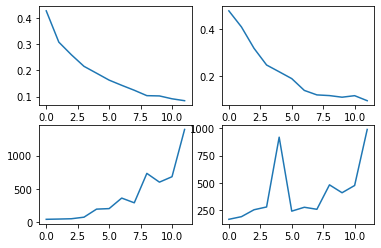

In [82]:
import matplotlib.pyplot as plt
# plt.subplots(2,2)
plt.subplot(221)
plt.plot(my_l['epoch'], my_l['train'])
plt.subplot(222)
plt.plot(my_l['epoch'], my_l['val'])
plt.subplot(223)
plt.plot(my_l['epoch'], my_l['solvent'])
plt.subplot(224)
plt.plot(my_l['epoch'], my_l['solute'])

In [1]:
from my_nets.net_func import *
plot_losses(project_path('Solvation_1/Runs/Macro_TESA_Lin6/run_log.tsv'), 3)

TypeError: plot_losses() takes 1 positional argument but 2 were given

In [13]:
import numpy as np
ar = np.array((0,1,2,3,4,5,6,7,8,9,10))


In [18]:
list(ar[(ar%2==0)])

[0, 2, 4, 6, 8, 10]

In [3]:
int(0.0)

0